In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
"""fashion mnist - DNN (control case)"""
mnist = tf.keras.datasets.fashion_mnist
(train_img, train_label),(val_img, val_label) = mnist.load_data()
train_img = train_img/255.0
val_img = val_img/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_img,train_label, validation_data=(val_img,val_label), epochs=20)


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5728 - accuracy: 0.8003 - val_loss: 0.4877 - val_accuracy: 0.8277
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4344 - accuracy: 0.8481 - val_loss: 0.4656 - val_accuracy: 0.8319
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4083 - accuracy: 0.8563 - val_loss: 0.4315 - val_accuracy: 0.8478
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3895 - accuracy: 0.8625 - val_loss: 0.4309 - val_accuracy: 0.8435
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3741 - accuracy: 0.8670 - val_loss: 0.4215 - val_accuracy: 0.8475
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3610 - accuracy: 0.8713 - val_loss: 0.4068 - val_accuracy: 0.8558
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3489 - accuracy: 0.8758 - val_loss: 0.3980 - val_accuracy:

In [5]:
"""fashion mnist - CNN (test case)"""
"""same model as before but using convolutions for image processing"""
mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(val_images, val_labels) = mnist.load_data()
# img reshape
train_images = train_images.reshape(60000,28,28,1)
train_images = train_images/255.0
# image reshape
val_images = val_images.reshape(10000,28,28,1)
val_images = val_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(train_images,train_labels,validation_data=(val_images,val_labels),epochs=20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                32020     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [6]:
"""print labels"""
print(val_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


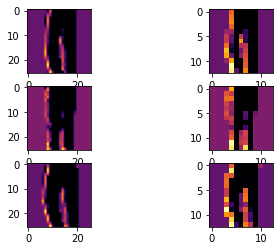

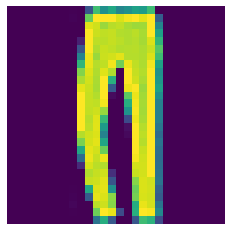

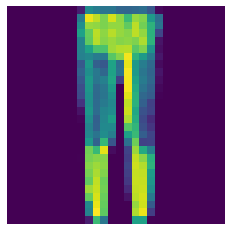

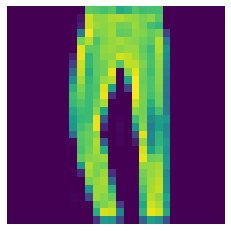

In [16]:
"""visualize data"""
def show_images(img):
    plt.figure()
    plt.imshow(val_images[img].reshape(28,28))
    plt.grid(False)
    plt.axis('off')
    plt.show()

f, axarr = plt.subplots(3,2)
first_image = 2
second_image = 3
third_image = 5

convolution_number = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs = layer_outputs)

for x in range(0,2):
    f1 = activation_model.predict(val_images[first_image].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:,convolution_number],cmap = 'inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(val_images[second_image].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:,convolution_number],cmap = 'inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(val_images[third_image].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0,:,:,convolution_number],cmap = 'inferno')
    axarr[2,x].grid(False)

show_images(first_image)
show_images(second_image)
show_images(third_image)

